<a href="https://colab.research.google.com/github/mvresh/BikeDataAnalysis/blob/master/Bike_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
py_list = range(20000000)
numpy_array = np.arange(20000000)


In [163]:
%%timeit
total = 0
for x in py_list:
  x += total * total

1 loop, best of 3: 1.7 s per loop


In [164]:
%%timeit
np.sum(numpy_array * numpy_array)

10 loops, best of 3: 84 ms per loop


Using timeit() , we've determined that numpy does fast array computations.

# First section

In [0]:
import pandas as pd
import numpy as np

In [166]:
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]

compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]

display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]

display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]

display.column_space No description available.
    [default: 12] [currently: 12]

display.date_dayfirst : boolean
    When True, prints and parses dates with the day first, eg 20/01/2005
    [default: False] [currently: False]

display.date_year

In [0]:
import matplotlib
# this displays graphs inline
%matplotlib inline

# Making graphs a bit more accessible
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 400)

#bigger fonts
matplotlib.rc('figure', figsize=(14,7))
matplotlib.rc('font', family='normal', weight = 'bold', size = 22)

In [168]:
bike_data = pd.read_csv("./bikes.csv", encoding='latin1', sep=';', index_col='Date', parse_dates=True, dayfirst=True)
bike_data[:5]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [0]:
# getting rid of missing cols

bike_data = bike_data.dropna(axis = 1)

In [170]:
# for simplicity sake, using only 3 cols first

bike_data = bike_data[['Berri 1', 'Côte-Sainte-Catherine', 'Maisonneuve 1']]
bike_data[:5]


,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1
Date,,,
2012-01-01,35,0,38
2012-01-02,83,1,68
2012-01-03,135,2,104
2012-01-04,144,1,116
2012-01-05,197,2,124


In [171]:
bike_data[:3]

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1
Date,,,
2012-01-01,35,0,38
2012-01-02,83,1,68
2012-01-03,135,2,104


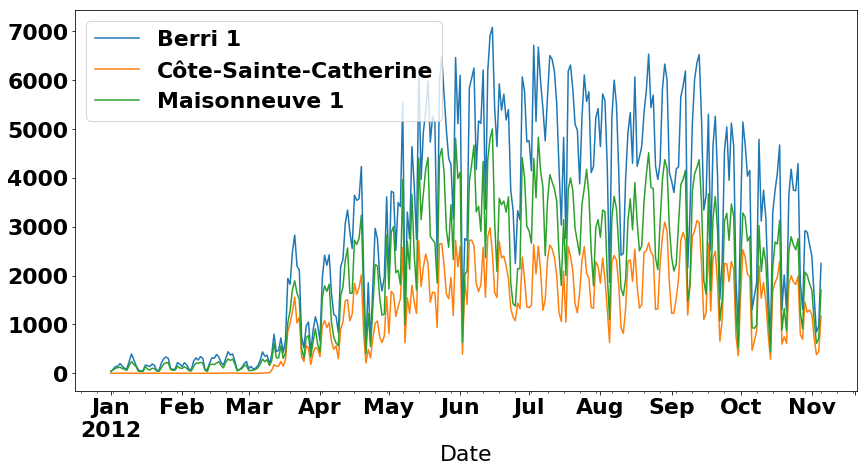

In [172]:
bike_data.plot()

In [173]:
bike_data.median()

Berri 1                  3128.0
Côte-Sainte-Catherine    1269.0
Maisonneuve 1            2019.5
dtype: float64

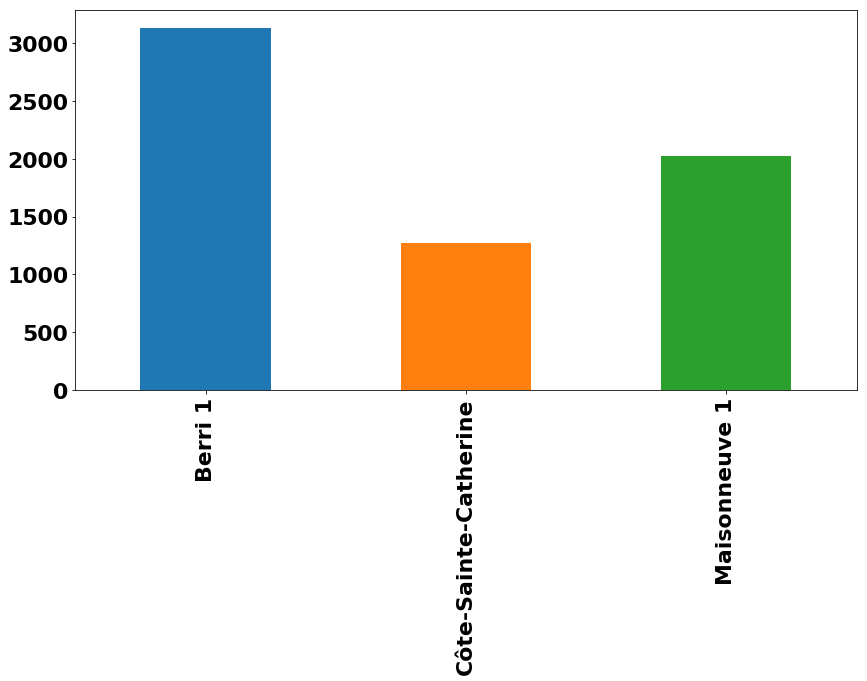

In [174]:
bike_data.median().plot(kind='bar')

In [175]:
# now, col slicing

column_slice = bike_data[['Berri 1', 'Maisonneuve 1']]

column_slice[:3]

,Berri 1,Maisonneuve 1
Date,,
2012-01-01,35,38
2012-01-02,83,68
2012-01-03,135,104


In [176]:
# checking for when its worse

bike_data['Berri 1'] < 75 

Date
2012-01-01     True
2012-01-02    False
2012-01-03    False
2012-01-04    False
2012-01-05    False
2012-01-06    False
2012-01-07    False
2012-01-08    False
2012-01-09    False
2012-01-10    False
2012-01-11    False
2012-01-12    False
2012-01-13    False
2012-01-14     True
2012-01-15     True
2012-01-16    False
2012-01-17    False
2012-01-18    False
2012-01-19    False
2012-01-20    False
2012-01-21     True
2012-01-22     True
2012-01-23    False
2012-01-24    False
2012-01-25    False
2012-01-26    False
2012-01-27    False
2012-01-28    False
2012-01-29    False
2012-01-30    False
              ...  
2012-10-07    False
2012-10-08    False
2012-10-09    False
2012-10-10    False
2012-10-11    False
2012-10-12    False
2012-10-13    False
2012-10-14    False
2012-10-15    False
2012-10-16    False
2012-10-17    False
2012-10-18    False
2012-10-19    False
2012-10-20    False
2012-10-21    False
2012-10-22    False
2012-10-23    False
2012-10-24    False
2012-10-25    F

In [177]:
bike_data[bike_data['Berri 1'] < 75]

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1
Date,,,
2012-01-01,35,0,38
2012-01-14,32,0,54
2012-01-15,54,0,33
2012-01-21,53,0,47
2012-01-22,71,0,41
2012-02-05,72,0,46
2012-02-11,71,0,63
2012-02-25,62,0,48


# Second Section

Checking if people bike more on weekdays or weekends

In [178]:
bike_data['weekday'] = bike_data.index.weekday
bike_data.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,weekday
Date,,,,
2012-01-01,35,0,38,6
2012-01-02,83,1,68,0
2012-01-03,135,2,104,1
2012-01-04,144,1,116,2
2012-01-05,197,2,124,3


In [179]:
# aggregating the counts

counts_by_day = bike_data.groupby('weekday').aggregate(np.sum)
counts_by_day

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1
weekday,,,
0,134298,60329,90051
1,135305,58708,92035
2,152972,67344,104891
3,160131,69028,111895
4,141771,56446,98568
5,101578,34018,62067
6,99310,36466,55324


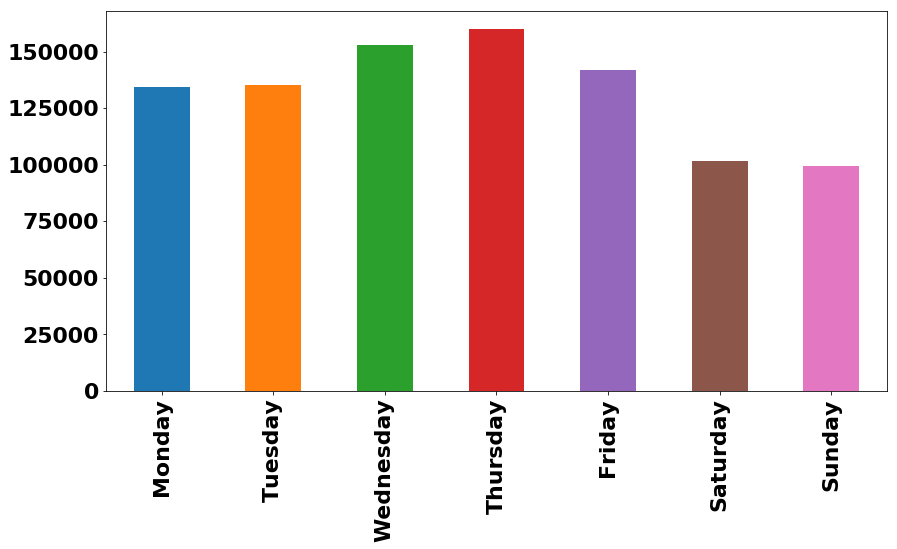

In [180]:
counts_by_day.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
counts_by_day['Berri 1'].plot(kind='bar')

# Third Section

In [0]:
# getting weather data to look at temps

def get_weather_data(year):
  
  url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?stationID=5415&Year={year}&Month={month}&format=csv&timeframe=1&submit=%20Download+Data"
  
  # airport station is 5415, hence that was used
  
  data_by_month = []
  
  for month in range(1,13):
    
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, encoding='utf-8', header=0)
    weather_data.columns = map(lambda x: x.replace('\xb0', ''), weather_data.columns)
    
    # xbo is degree symbol
    
    weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time'], axis=1)
    data_by_month.append(weather_data.dropna())
    
    
  return pd.concat(data_by_month).dropna(axis=1, how='any').dropna()

In [0]:
weather_data = get_weather_data(2012)

In [183]:
weather_data[:3]

,Temp (C),Temp Flag,Dew Point Temp (C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),...,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,


In [0]:
def download_weather_month(year, month):
  
    url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?stationID=5415&Year={year}&Month={month}&format=csv&timeframe=1&submit=%20Download+Data"
  
    if month == 1:
        year += 1
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, header=0)
    weather_data = weather_data.dropna(axis=1)
    weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns]
    weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time'], axis=1)
    return weather_data

In [0]:
# testing

monthly_weather_data = download_weather_month(2012,2)

In [186]:
# testing

monthly_weather_data

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-02-01 00:00:00,-6.7,-9.7,79,19,11.3,100.82,Snow
2012-02-01 01:00:00,-6.7,-9.5,80,15,9.7,100.69,Snow
2012-02-01 02:00:00,-6.8,-9.3,82,19,4.8,100.61,Freezing Drizzle
2012-02-01 03:00:00,-6.5,-9.0,82,15,4.8,100.56,Freezing Rain
2012-02-01 04:00:00,-5.8,-8.2,83,17,8.0,100.48,Freezing Rain
2012-02-01 05:00:00,-5.8,-8.5,81,19,8.0,100.42,Freezing Drizzle
2012-02-01 06:00:00,-5.4,-8.0,82,15,8.0,100.34,Freezing Rain
2012-02-01 07:00:00,-5.5,-8.2,81,13,9.7,100.33,Freezing Rain
2012-02-01 08:00:00,-5.5,-8.5,79,11,11.3,100.36,Cloudy


In [0]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]

In [0]:
weather_2012 = pd.concat(data_by_month)
weather_2012.to_csv('/weather_2012.csv')

In [189]:
weather_2012 = pd.read_csv('/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2013-01-01 00:00:00,-1.0,-1.7,95,35,6.4,99.89,Snow
2013-01-01 01:00:00,-2.0,-5.1,79,35,16.1,99.93,Mainly Clear
2013-01-01 02:00:00,-2.7,-6.0,78,28,19.3,100.08,Snow
2013-01-01 03:00:00,-5.6,-11.7,62,30,25.0,100.21,Clear
2013-01-01 04:00:00,-7.7,-12.6,68,35,19.3,100.32,Mainly Clear


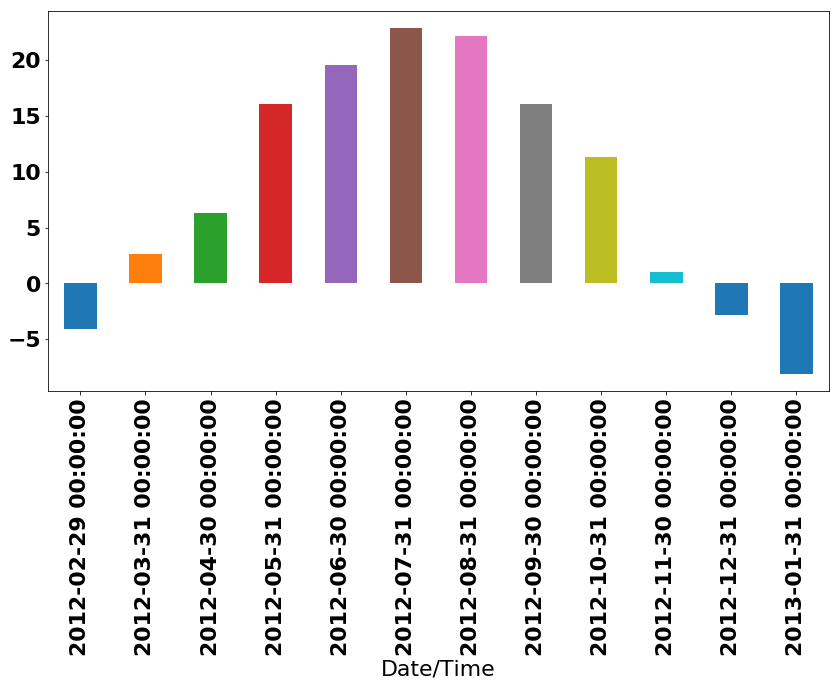

In [190]:
weather_2012['Temp (C)'].resample('M').apply(np.median).plot(kind='bar')


In [191]:
bike_data['mean temp'] = weather_data['Temp (C)'].resample('D').mean()
bike_data.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,weekday,mean temp
Date,,,,,
2012-01-01,35,0,38,6,NaN
2012-01-02,83,1,68,0,NaN
2012-01-03,135,2,104,1,NaN
2012-01-04,144,1,116,2,NaN
2012-01-05,197,2,124,3,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0ae58b7f0>,
      dtype=object)

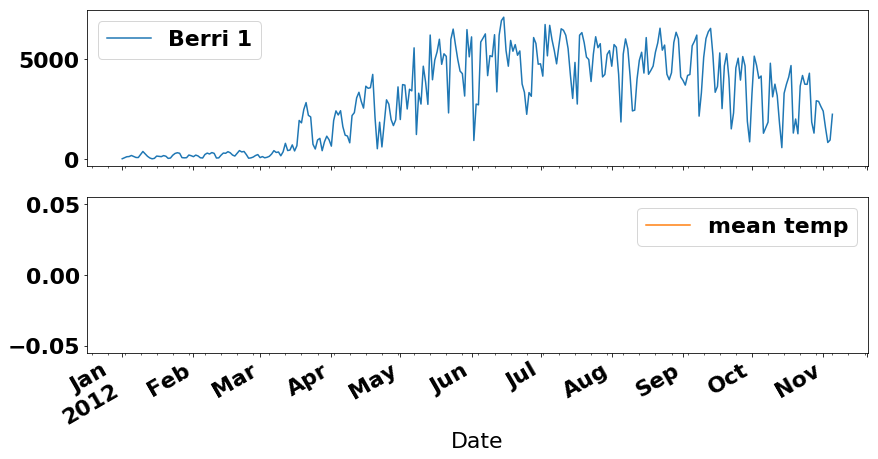

In [192]:
bike_data[['Berri 1', 'mean temp']].plot(subplots=True)

# Third Section Revised

In [0]:
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?stationID=5415&Year={year}&Month={month}&format=csv&timeframe=1&submit=%20Download+Data"

In [0]:
def download_weather_month(year, month):
    
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, header=0)
    weather_data = weather_data.dropna(axis=1)
    weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns]
    weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time'], axis=1)
    return weather_data

In [195]:
download_weather_month(2012, 3)

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-03-01 00:00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-5.4,-7.8,83,35,1.6,100.62,Snow
2012-03-01 05:00:00,-5.3,-7.9,82,33,2.4,100.58,Snow
2012-03-01 06:00:00,-5.2,-7.8,82,33,4.0,100.57,Snow
2012-03-01 07:00:00,-4.9,-7.4,83,30,1.6,100.59,Snow
2012-03-01 08:00:00,-5.0,-7.5,83,32,1.2,100.59,Snow


In [0]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]

In [197]:
data_by_month

[                     Temp (C)  Dew Point Temp (C)  Rel Hum (%)  Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)                Weather
 Date/Time                                                                                                                               
 2012-01-01 00:00:00      -1.8                -3.9           86                4              8.0           101.24                    Fog
 2012-01-01 01:00:00      -1.8                -3.7           87                4              8.0           101.24                    Fog
 2012-01-01 02:00:00      -1.8                -3.4           89                7              4.0           101.26   Freezing Drizzle,Fog
 2012-01-01 03:00:00      -1.5                -3.2           88                6              4.0           101.27   Freezing Drizzle,Fog
 2012-01-01 04:00:00      -1.5                -3.3           88                7              4.8           101.23                    Fog
 2012-01-01 05:00:00      -1.4    

In [0]:
weather_2012 = pd.concat(data_by_month)

In [199]:
weather_2012

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog


In [200]:
bike_data['mean temp'] = weather_data['Temp (C)'].resample('D', how='mean')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


In [201]:
bike_data.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,weekday,mean temp
Date,,,,,
2012-01-01,35,0,38,6,NaN
2012-01-02,83,1,68,0,NaN
2012-01-03,135,2,104,1,NaN
2012-01-04,144,1,116,2,NaN
2012-01-05,197,2,124,3,NaN
